In [14]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
# Accessing the Final Project folder 
%cd '/content/drive/MyDrive/Georgia Tech/Machine Learning-CS7641/Assignments/Assignment #4'

/content/drive/MyDrive/Georgia Tech/Machine Learning-CS7641/Assignments/Assignment #4


In [16]:
import gym
import random

In [108]:
from gym.envs.toy_text import frozen_lake

In [109]:
frozen_lake_small = frozen_lake.generate_random_map(size=8)
frozen_lake_8_8 = gym.make('FrozenLake-v0', desc=frozen_lake_small, map_name= None, is_slippery=True)

In [110]:
frozen_lake_8_8.render()


SHFFFFFF
FFFHFFFH
FFFHFFFF
FFFFFFFF
FFFFFFHH
HFFFFFFH
FFFFFFFH
FHFFFFFG


In [111]:
import gym
import re
import numpy as np



class OpenAI_MDPToolbox:

    """Class to convert Discrete Open AI Gym environemnts to MDPToolBox environments. 
    You can find the list of available gym environments here: https://gym.openai.com/envs/#classic_control
    You'll have to look at the source code of the environments for available kwargs; as it is not well documented.  
    """
    
    def __init__(self, openAI_env_name, render:bool=False, **kwargs):
        """Create a new instance of the OpenAI_MDPToolbox class
        :param openAI_env_name: Valid name of an Open AI Gym env 
        :type openAI_env_name: str
        :param render: whether to render the Open AI gym env
        :type rander: boolean 
        """
        self.env_name = openAI_env_name
    
        # self.env = gym.make(self.env_name, **kwargs)
        self.env = openAI_env_name
        self.env.reset()

        if render:
            self.env.render()
        
        self.transitions = self.env.P
        self.actions = int(re.findall(r'\d+', str(self.env.action_space))[0])
        self.states = int(re.findall(r'\d+', str(self.env.observation_space))[0])
        self.P = np.zeros((self.actions, self.states, self.states))
        self.R = np.zeros((self.states, self.actions))
        self.convert_PR()
        
    def convert_PR(self):
        """Converts the transition probabilities provided by env.P to MDPToolbox-compatible P and R arrays
        """
        for state in range(self.states):
            for action in range(self.actions):
                for i in range(len(self.transitions[state][action])):
                    tran_prob = self.transitions[state][action][i][0]
                    state_ = self.transitions[state][action][i][1]
                    self.R[state][action] += tran_prob*self.transitions[state][action][i][2]
                    self.P[action, state, state_] += tran_prob

In [112]:
#Converting Openai object to mdptoolbox
frozen_lake_8_8_mdp = OpenAI_MDPToolbox(frozen_lake_8_8)

In [113]:
#Double Checking  
frozen_lake_8_8_mdp.states

64

In [114]:
#Retreiving P and R Matrices
P_small = frozen_lake_8_8_mdp.P
R_small = frozen_lake_8_8_mdp.R

In [115]:
P_small.shape

(4, 64, 64)

In [116]:
R_small.shape

(64, 4)

In [37]:
% cd hiivemdptoolbox/

[Errno 2] No such file or directory: 'hiivemdptoolbox/'
/content/drive/MyDrive/Georgia Tech/Machine Learning-CS7641/Assignments/Assignment #4/hiivemdptoolbox


In [117]:
import hiive.mdptoolbox.example

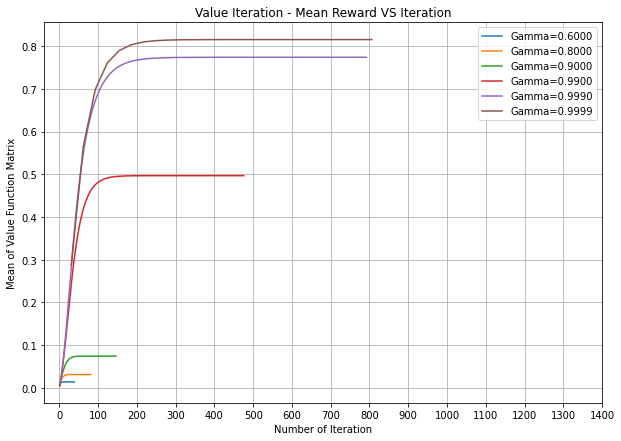

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(10,7))
plt.grid()
Gamma = [0.6, 0.8, 0.9, 0.99, 0.999, 0.9999]


for g in Gamma:
  vi_frozen_small = hiive.mdptoolbox.mdp.ValueIteration(P_small, R_small, gamma= g, epsilon= 1e-10)
  vi_frozen_small.run()
  df = pd.DataFrame(vi_frozen_small.run_stats)
  plt.plot(df['Iteration'], df['Mean V'], label= 'Gamma={:.4f}'.format(g))


plt.legend(loc= 'best')
plt.xticks(range(0,1500, 100))
plt.xlabel('Number of Iteration')
plt.ylabel('Mean of Value Function Matrix')
plt.title('Value Iteration - Mean Reward VS Iteration')
plt.show()

In [119]:
#optimal Value Itearation
  
vi_frozen_small_optimal = hiive.mdptoolbox.mdp.ValueIteration(P_small, R_small, gamma= 0.9999, epsilon= 1e-10)
vi_frozen_small_optimal.run()

[{'Action': None,
  'Error': 0.018543876724608194,
  'Iteration': 31,
  'Max V': 0.8846604791440016,
  'Mean V': 0.2881596465650884,
  'Reward': 0.8846604791440016,
  'State': None,
  'Time': 0.003223419189453125},
 {'Action': None,
  'Error': 0.011463489606064026,
  'Iteration': 62,
  'Max V': 0.9510732606056118,
  'Mean V': 0.5655617120254581,
  'Reward': 0.9510732606056118,
  'State': None,
  'Time': 0.005400657653808594},
 {'Action': None,
  'Error': 0.005789529821981332,
  'Iteration': 93,
  'Max V': 0.9762445366298651,
  'Mean V': 0.699013321423702,
  'Reward': 0.9762445366298651,
  'State': None,
  'Time': 0.0072154998779296875},
 {'Action': None,
  'Error': 0.0027400664836806365,
  'Iteration': 124,
  'Max V': 0.9881580231637761,
  'Mean V': 0.7610175701867185,
  'Reward': 0.9881580231637761,
  'State': None,
  'Time': 0.009032011032104492},
 {'Action': None,
  'Error': 0.001285091189715204,
  'Iteration': 155,
  'Max V': 0.9937352723036776,
  'Mean V': 0.7900125236436298,
  'R

In [120]:
#Optimal Policy
vi_opt_policy = np.reshape(vi_frozen_small_optimal.policy, (8,8))

- 0: LEFT
- 1: DOWN
- 2: RIGHT
- 3: UP

In [121]:
move_dict = {0: 'L', 1: 'D', 2:'R', 3: 'U'}

In [182]:
def heat_map(matrix, size, title, move_dict = None):
  fig, ax = plt.subplots()
  im = ax.imshow(matrix)

  # Show all ticks and label them with the respective list entries
  ax.set_xticks(np.arange(len(range(size))))
  ax.set_yticks(np.arange(len(range(size))))

  # Loop over data dimensions and create text annotations.
  for i in range(len(range(size))):
      for j in range(len(range(size))):
        if move_dict:
          text = ax.text(j, i, move_dict[matrix[i, j]],
                        ha="center", va="center", color="w")
        else:
          text = ax.text(j, i, np.round(matrix[i, j],2),
                        ha="center", va="center", color="w")

  ax.set_title(title)
  fig.tight_layout()
  plt.show()

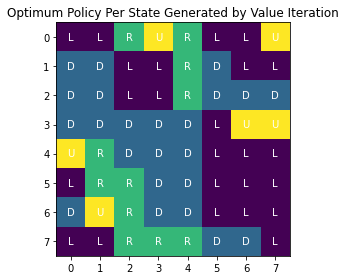

In [127]:
heat_map(vi_opt_policy, 8, "Optimum Policy Per State Generated by Value Iteration" ,move_dict= move_dict)

In [128]:
#Value function of optimal Policy
vi_opt_value = np.reshape(vi_frozen_small_optimal.V, (8,8))

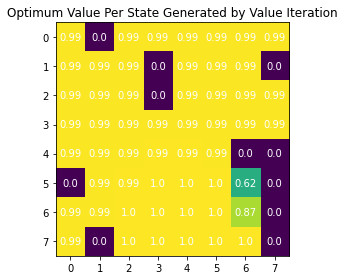

In [129]:
heat_map(vi_opt_value, 8, "Optimum Value Per State Generated by Value Iteration")

In [130]:
frozen_lake_8_8.render()


SHFFFFFF
FFFHFFFH
FFFHFFFF
FFFFFFFF
FFFFFFHH
HFFFFFFH
FFFFFFFH
FHFFFFFG


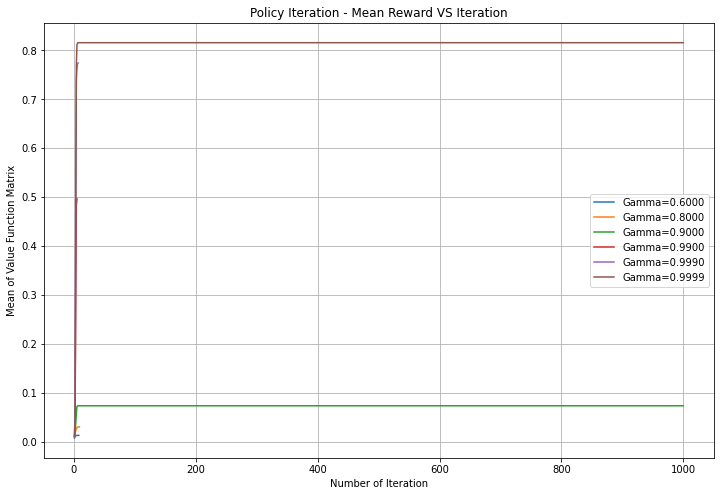

In [131]:
#Policy Iteration

figure(figsize=(12,8))
plt.grid()
Gamma = [0.6, 0.8, 0.9, 0.99, 0.999, 0.9999]


for g in Gamma:
  pi_frozen_small = hiive.mdptoolbox.mdp.PolicyIteration(P_small, R_small, gamma= g)
  pi_frozen_small.run()
  df_pi = pd.DataFrame(pi_frozen_small.run_stats)
  plt.plot(df_pi['Iteration'], df_pi['Mean V'], label= 'Gamma={:.4f}'.format(g))


plt.legend(loc= 'best')
plt.xlabel('Number of Iteration')
plt.ylabel('Mean of Value Function Matrix')
plt.title('Policy Iteration - Mean Reward VS Iteration')
plt.show()

In [132]:
#Optimal Policy Iteration
pi_frozen_small_optimal = hiive.mdptoolbox.mdp.PolicyIteration(P_small, R_small, gamma= 0.9999)
pi_frozen_small_optimal.run()

[{'Action': None,
  'Error': 0.16664166791660412,
  'Iteration': 1,
  'Max V': 0.49997500124993743,
  'Mean V': 0.011717578212884766,
  'Reward': 0.49997500124993743,
  'State': None,
  'Time': 0.00653076171875,
  'V[0]': 1.449346060642779e-33},
 {'Action': None,
  'Error': 0.12570406008877177,
  'Iteration': 2,
  'Max V': 0.7016220995606846,
  'Mean V': 0.0456842117528157,
  'Reward': 0.7016220995606846,
  'State': None,
  'Time': 0.007769346237182617,
  'V[0]': 0.00020740266768104655},
 {'Action': None,
  'Error': 0.057782379853034846,
  'Iteration': 3,
  'Max V': 0.7874223292723226,
  'Mean V': 0.4255533211094659,
  'Reward': 0.7874223292723226,
  'State': None,
  'Time': 0.008641481399536133,
  'V[0]': 0.5170887258160007},
 {'Action': None,
  'Error': 0.08959457173981655,
  'Iteration': 4,
  'Max V': 0.9945190946603581,
  'Mean V': 0.7681405592285951,
  'Reward': 0.9945190946603581,
  'State': None,
  'Time': 0.009448051452636719,
  'V[0]': 0.9566547746191167},
 {'Action': None,
  

In [133]:
#Optimal Policy
pi_opt_policy = np.reshape(pi_frozen_small_optimal.policy, (8,8))

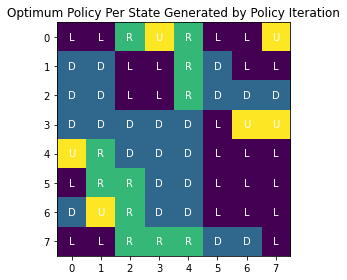

In [134]:
heat_map(pi_opt_policy, 8, "Optimum Policy Per State Generated by Policy Iteration" ,move_dict= move_dict)

In [135]:
#Value function of optimal Policy
pi_opt_value = np.reshape(pi_frozen_small_optimal.V, (8,8))

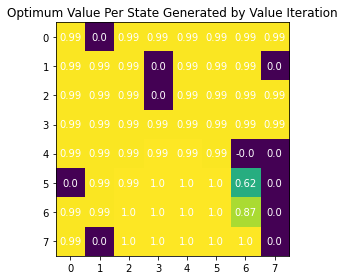

In [136]:
heat_map(pi_opt_value, 8, "Optimum Value Per State Generated by Value Iteration")

In [137]:
# Checking If Policies generated by VI and PI are same
vi_frozen_small_optimal.policy == pi_frozen_small_optimal.policy

True

In [138]:
res = tuple(map(lambda i, j: i - j, vi_frozen_small_optimal.policy,pi_frozen_small_optimal.policy)) 
#Finding the states which policy differs 

non_zero_index = np.nonzero(res)[0]

print(f'States which policy is differ {non_zero_index}')

States which policy is differ []


In [139]:
different_policy = np.reshape(res, (8,8))

In [140]:
diff_move = {0: 'S', -1: 'D', -2: 'D'}

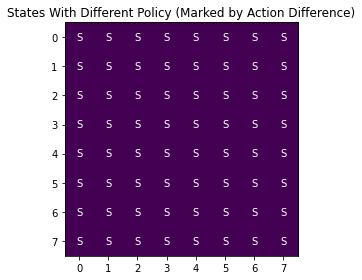

In [141]:
heat_map(different_policy, 8, 'States With Different Policy (Marked by Action Difference)', move_dict= diff_move)

- 0: LEFT
- 1: DOWN
- 2: RIGHT
- 3: UP

In [58]:
print(f'Action taken in 7th state in based on Value Iteration generated policy: {vi_frozen_small_optimal.policy[10]}')
print(f'Action taken in 7th state in based on Policy Iteration generated policy: {pi_frozen_small_optimal.policy[10]}')

print(f'\nAction taken in 19th state in based on Value Iteration generated policy: {vi_frozen_small_optimal.policy[35]}')
print(f'Action taken in 19th state in based on Policy Iteration generated policy: {pi_frozen_small_optimal.policy[35]}')

Action taken in 7th state in based on Value Iteration generated policy: 0
Action taken in 7th state in based on Policy Iteration generated policy: 1

Action taken in 19th state in based on Value Iteration generated policy: 0
Action taken in 19th state in based on Policy Iteration generated policy: 1


In [142]:
df_vi_optim_small = pd.DataFrame(vi_frozen_small_optimal.run_stats)
df_pi_optim_small = pd.DataFrame(pi_frozen_small_optimal.run_stats)

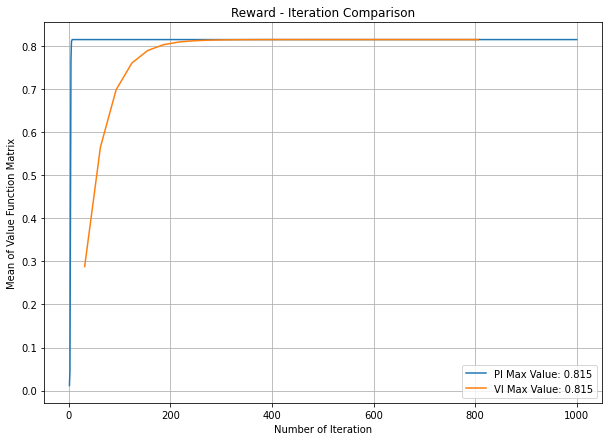

In [143]:
figure(figsize=(10,7))
plt.grid()

plt.plot(df_pi_optim_small['Iteration'], df_pi_optim_small['Mean V'], label ='PI Max Value: {:0.3f}'.format(df_pi_optim_small['Mean V'].max()))
plt.plot(df_vi_optim_small['Iteration'], df_vi_optim_small['Mean V'], label ='VI Max Value: {:0.3f}'.format(df_vi_optim_small['Mean V'].max()))
plt.legend(loc='best')
plt.xlabel('Number of Iteration')
plt.ylabel('Mean of Value Function Matrix')
plt.title('Reward - Iteration Comparison')
plt.show()

In [144]:
import math
def learning_rate_decay(n , min_rate = 0.01, decay_division = 25):
  """Decaying Learning rate"""
  return max(min_rate, min(1, 1 - math.log10(n + 1)/decay_division))

In [145]:
#Q Learning
import random
import time

def q_learning(env, action_space_size, state_space_size, num_episodes = 30000, 
               max_steps_per_episodes = 200, gamma = 0.99, learning_rate_decay_division = 25,  exploration_rate = 1,
               max_exploration_rate = 1, min_exploration_rate = 0.01, exploration_decay_rate = 0.0001, per_x_eposide_decay = None, exploration_decay = True):
  
  steps_list = []
  rewards_all_episodes = []
  #Initiate q table 
  q_table = np.zeros((state_space_size, action_space_size))

  for episode in range(num_episodes):
    # print(f'#### EPISODE {episode} #####')
    state = env.reset()
    # env.render()
    # time.sleep(0.1)
    agent_step = 0
    done = False
    rewards_current_episode = 0

    for step in range(max_steps_per_episodes):

      #Exploration - Exploitation trade-off

      exploration_rate_threshold = random.uniform(0, 1)
      if exploration_rate_threshold > exploration_rate:
        action = np.argmax(q_table[state, :])
      else:
        action = env.action_space.sample()
      
      new_state, reward, done, info = env.step(action)

      # env.render()
      # time.sleep(0.1)

      # if done:
      #   if new_state != 63:
      #     reward = -1
      #   else:
      #     reward = 1

      agent_step += 1

      #Update Q table
      learning_rate = learning_rate_decay(episode, decay_division= learning_rate_decay_division)
      # print(f'learning rate: {learning_rate}')
      q_table[state, action] = q_table[state, action] * (1 - learning_rate) + learning_rate * (reward + gamma * np.max(q_table[new_state, :]))

      state = new_state

      rewards_current_episode += reward

      if done == True:
        steps_list.append(agent_step)
        break

    if exploration_decay: 
      if per_x_eposide_decay:
        if episode % per_x_eposide_decay == 0:
          exploration_rate = min_exploration_rate + \
          (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate * episode)
      else:
          exploration_rate = min_exploration_rate + \
          (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate * episode)
          # print(f'exploration rate: {exploration_rate}')
      rewards_all_episodes.append(rewards_current_episode)
    
  return rewards_all_episodes, steps_list, q_table




In [146]:
def X_per_y_episodes(X_list, y, num_episodes=30000):
  x_list = []
  X_per_y_episodes_list = np.split(np.array(X_list), num_episodes/y)
  for r in X_per_y_episodes_list:
    x_list.append(sum(r/y))
  
  return x_list

In [147]:
action_space_size = frozen_lake_8_8.action_space.n
state_space_size = frozen_lake_8_8.observation_space.n

In [148]:
reward, agent_step, q_t = q_learning(frozen_lake_8_8, action_space_size=action_space_size, state_space_size = state_space_size)

In [149]:
from collections import Counter
Counter(reward)

Counter({0.0: 27795, 1.0: 2205})

In [150]:
reward_list = X_per_y_episodes(reward, y=1000)

In [151]:
reward_list

[0.0,
 0.002,
 0.002,
 0.002,
 0.010000000000000002,
 0.009000000000000001,
 0.012000000000000004,
 0.015000000000000006,
 0.017000000000000008,
 0.023000000000000013,
 0.022000000000000013,
 0.03300000000000002,
 0.04100000000000003,
 0.05400000000000004,
 0.04400000000000003,
 0.07500000000000005,
 0.06900000000000005,
 0.06800000000000005,
 0.09400000000000007,
 0.06700000000000005,
 0.10800000000000008,
 0.11400000000000009,
 0.12800000000000009,
 0.12000000000000009,
 0.1340000000000001,
 0.1590000000000001,
 0.16700000000000012,
 0.20800000000000016,
 0.18600000000000014,
 0.22200000000000017]

In [152]:
step_taken = X_per_y_episodes(agent_step, y=1000)
step_taken

[7.902999999999994,
 8.239999999999988,
 9.296999999999972,
 11.304999999999971,
 11.42499999999997,
 12.015999999999973,
 14.004999999999972,
 15.178999999999963,
 16.105999999999973,
 17.618999999999982,
 19.564999999999994,
 21.479000000000017,
 23.034000000000034,
 24.19600000000001,
 27.221000000000036,
 28.423999999999978,
 30.81900000000006,
 33.980000000000096,
 34.612000000000045,
 35.901000000000145,
 38.236,
 41.27200000000005,
 45.824000000000154,
 47.505000000000116,
 46.24400000000018,
 50.05400000000024,
 51.296000000000184,
 52.29100000000022,
 56.63300000000037,
 56.286000000000264]

Text(0.5, 1.0, 'Reward VS 1000 episodes')

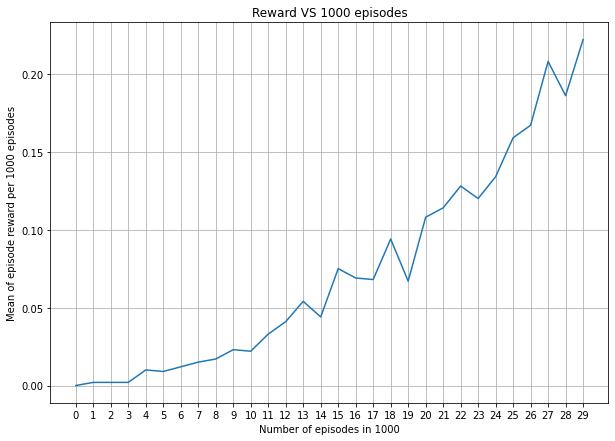

In [153]:
figure(figsize=(10,7))
plt.grid()

plt.plot(range(len(reward_list)), reward_list)
plt.xlabel('Number of episodes in 1000')
plt.xticks(range(len(reward_list)))
plt.ylabel('Mean of episode reward per 1000 episodes')
plt.title('Reward VS 1000 episodes')

Text(0.5, 1.0, 'steps VS 1000 episodes')

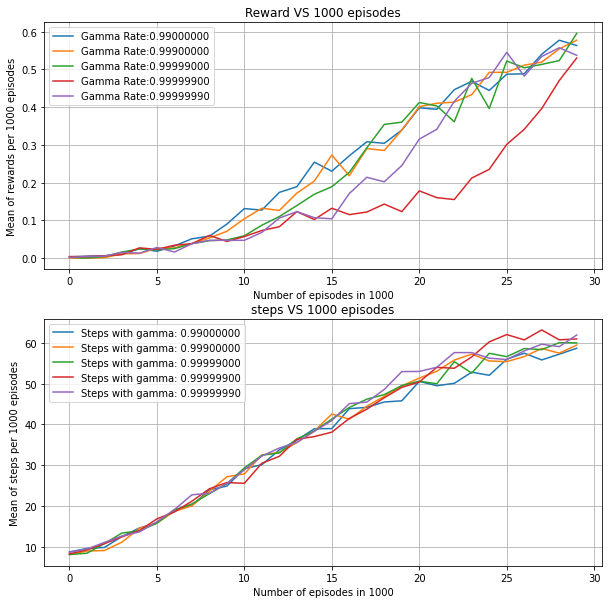

In [156]:
#Hyper-Parameters Tuning
import seaborn as sns
fig, ax = plt.subplots(2, 1, figsize=(10,10))


ax[0].grid()
ax[1].grid()


gamma_list = [0.99, 0.999, 0.99999, 0.999999, 0.9999999]

for g in gamma_list:
  reward_h, agent_step_h, q_t = q_learning(frozen_lake_8_8, action_space_size=action_space_size, state_space_size = state_space_size, gamma = g, learning_rate_decay_division=5)
  reward_list_h = X_per_y_episodes(reward_h, y=1000)
  steps_taken_h = X_per_y_episodes(agent_step_h, y=1000)
  r = sns.lineplot(x = range(len(reward_list_h)), y = reward_list_h, label='Gamma Rate:{:0.8f}'.format(g), ax = ax[0])
  s = sns.lineplot(x = range(len(steps_taken_h)), y = steps_taken_h, label='Steps with gamma: {:0.8f}'.format(g), ax = ax[1])


ax[0].legend(loc='best')
ax[1].legend(loc='best')


r.set_xlabel('Number of episodes in 1000')
r.set_ylabel('Mean of rewards per 1000 episodes')
r.set_title('Reward VS 1000 episodes')

s.set_xlabel('Number of episodes in 1000')
s.set_ylabel('Mean of steps per 1000 episodes')
s.set_title('steps VS 1000 episodes')


Text(0.5, 1.0, 'steps VS 1000 episodes')

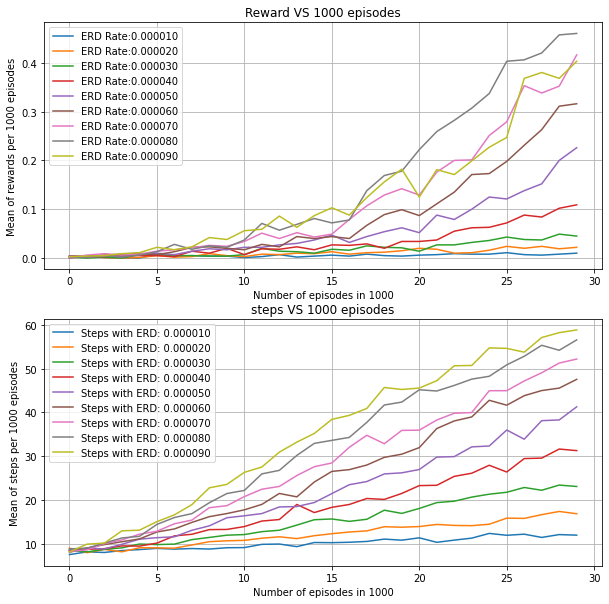

In [158]:
#Hyper-Parameters Tuning
import seaborn as sns
fig, ax = plt.subplots(2, 1, figsize=(10,10))


ax[0].grid()
ax[1].grid()

exploration_decay_rate_list = list(np.arange(0.00001, 0.0001, 0.00001))
for erd in exploration_decay_rate_list:
  reward_h, agent_step_h, q_t_erd = q_learning(frozen_lake_8_8, action_space_size=action_space_size, state_space_size = state_space_size, exploration_decay_rate= erd, gamma= 0.999999, learning_rate_decay_division=5)
  reward_list_h = X_per_y_episodes(reward_h, y=1000)
  steps_taken_h = X_per_y_episodes(agent_step_h, y=1000)
  r = sns.lineplot(x = range(len(reward_list_h)), y = reward_list_h, label='ERD Rate:{:0.6f}'.format(erd), ax = ax[0])
  s = sns.lineplot(x = range(len(steps_taken_h)), y = steps_taken_h, label='Steps with ERD: {:0.6f}'.format(erd), ax = ax[1])


ax[0].legend(loc='best')
ax[1].legend(loc='best')


r.set_xlabel('Number of episodes in 1000')
r.set_ylabel('Mean of rewards per 1000 episodes')
r.set_title('Reward VS 1000 episodes')

s.set_xlabel('Number of episodes in 1000')
s.set_ylabel('Mean of steps per 1000 episodes')
s.set_title('steps VS 1000 episodes')

Text(0.5, 1.0, 'steps VS 1000 episodes')

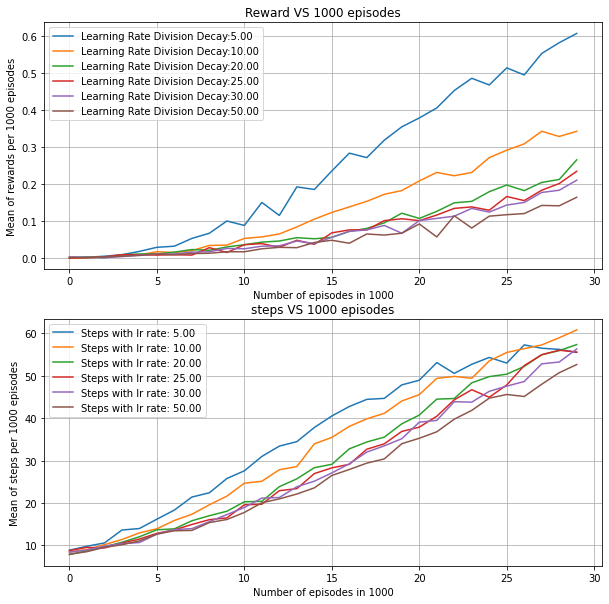

In [154]:
from numpy.random.mtrand import gamma
#Hyper-Parameters Tuning
import seaborn as sns
fig, ax = plt.subplots(2, 1, figsize=(10,10))


ax[0].grid()
ax[1].grid()


learning_rate_decay_list = [5, 10, 20, 25, 30, 50]

for lr in learning_rate_decay_list:
  reward_h, agent_step_h, q_table_lr = q_learning(frozen_lake_8_8, action_space_size=action_space_size, state_space_size = state_space_size, learning_rate_decay_division= lr)
  reward_list_h = X_per_y_episodes(reward_h, y=1000)
  steps_taken_h = X_per_y_episodes(agent_step_h, y=1000)
  r = sns.lineplot(x = range(len(reward_list_h)), y = reward_list_h, label='Learning Rate Division Decay:{:0.2f}'.format(lr), ax = ax[0])
  s = sns.lineplot(x = range(len(steps_taken_h)), y = steps_taken_h, label='Steps with lr rate: {:0.2f}'.format(lr), ax = ax[1])


ax[0].legend(loc='best')
ax[1].legend(loc='best')


r.set_xlabel('Number of episodes in 1000')
r.set_ylabel('Mean of rewards per 1000 episodes')
r.set_title('Reward VS 1000 episodes')

s.set_xlabel('Number of episodes in 1000')
s.set_ylabel('Mean of steps per 1000 episodes')
s.set_title('steps VS 1000 episodes')

Wining Chance with 100000 Episodes Training is: 0.52827
Wining Chance with 200000 Episodes Training is: 0.64919
Wining Chance with 300000 Episodes Training is: 0.68699
Wining Chance with 400000 Episodes Training is: 0.7046675


Text(0.5, 1.0, 'steps VS 1000 episodes')

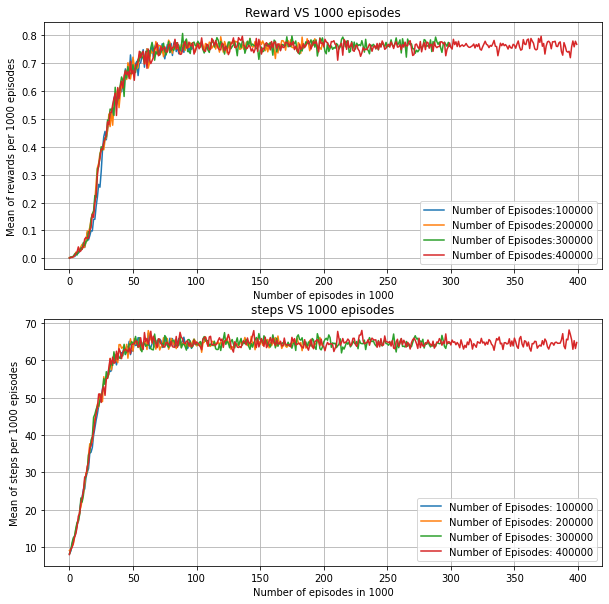

In [160]:
#Hyper-Parameters Tuning
import seaborn as sns
fig, ax = plt.subplots(2, 1, figsize=(10,10))


ax[0].grid()
ax[1].grid()

number_episodes = [100000, 200000, 300000, 400000]

for num in number_episodes:
  reward_h, agent_step_h, q_table_h = q_learning(frozen_lake_8_8, action_space_size=action_space_size, state_space_size = state_space_size, num_episodes= num, gamma= 0.999999, learning_rate_decay_division=5, exploration_decay_rate= 0.00008)
  print(f'Wining Chance with {num} Episodes Training is: {Counter(reward_h)[1]/num}')
  reward_list_h = X_per_y_episodes(reward_h, y=1000, num_episodes= num)
  steps_taken_h = X_per_y_episodes(agent_step_h, y=1000, num_episodes= num)
  
  r = sns.lineplot(x = range(len(reward_list_h)), y = reward_list_h, label='Number of Episodes:{}'.format(num), ax = ax[0])
  s = sns.lineplot(x = range(len(steps_taken_h)), y = steps_taken_h, label='Number of Episodes: {}'.format(num), ax = ax[1])

ax[0].legend(loc='best')
ax[1].legend(loc='best')

r.set_xlabel('Number of episodes in 1000')
r.set_ylabel('Mean of rewards per 1000 episodes')
r.set_title('Reward VS 1000 episodes')

s.set_xlabel('Number of episodes in 1000')
s.set_ylabel('Mean of steps per 1000 episodes')
s.set_title('steps VS 1000 episodes')

In [161]:
reward_optimal, agent_step_optimal, q_table_opt = q_learning(frozen_lake_8_8, action_space_size=action_space_size, state_space_size = state_space_size, num_episodes= 200000, gamma= 0.999999, learning_rate_decay_division=5, exploration_decay_rate= 0.00008)

In [162]:
print(f'Wining Chance with {300000} Episodes Training is: {Counter(reward_optimal)[1]/300000}')

Wining Chance with 300000 Episodes Training is: 0.4273033333333333


In [165]:
reward_list_optimal = X_per_y_episodes(reward_optimal, y=1000, num_episodes= 200000)

In [166]:
step_list_optimal = X_per_y_episodes(agent_step_optimal, y=1000, num_episodes= 200000)

Text(0.5, 1.0, 'steps VS 1000 episodes')

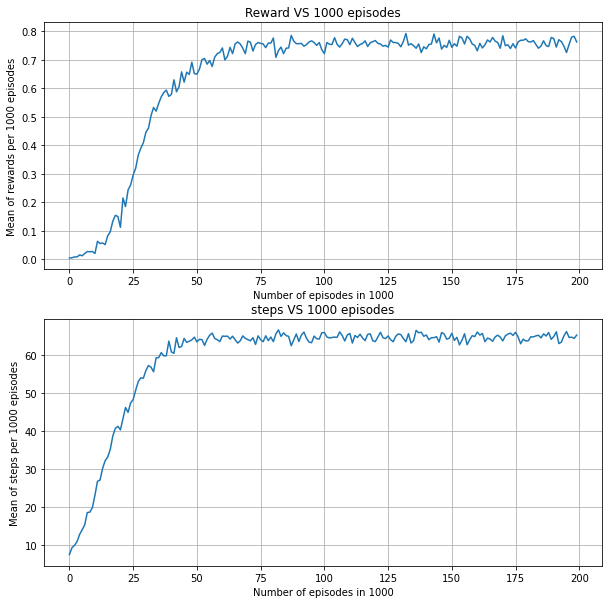

In [167]:
import seaborn as sns
fig, ax = plt.subplots(2, 1, figsize=(10,10))


ax[0].grid()
ax[1].grid()

r = sns.lineplot(x = range(len(reward_list_optimal)), y = reward_list_optimal, ax = ax[0])
s = sns.lineplot(x = range(len(step_list_optimal)), y = step_list_optimal, ax = ax[1])

r.set_xlabel('Number of episodes in 1000')
r.set_ylabel('Mean of rewards per 1000 episodes')
r.set_title('Reward VS 1000 episodes')

s.set_xlabel('Number of episodes in 1000')
s.set_ylabel('Mean of steps per 1000 episodes')
s.set_title('steps VS 1000 episodes')

In [177]:
q_table_opt_policy = np.reshape(np.argmax(q_table_opt, axis=1), (8,8))

In [1]:
heat_map(q_table_opt_policy, 8, "Optimum Policy Per State Generated by Q-Learning" ,move_dict= move_dict)

NameError: ignored

In [176]:
q_table_opt_value = np.reshape(np.max(q_table_opt, axis=1), (8,8))

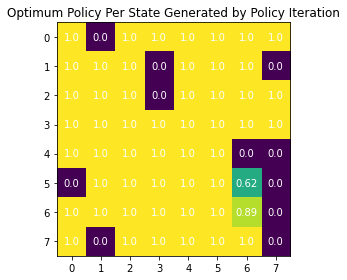

In [183]:
heat_map(q_table_opt_value, 8, "Optimum Policy Per State Generated by Q Learning") 